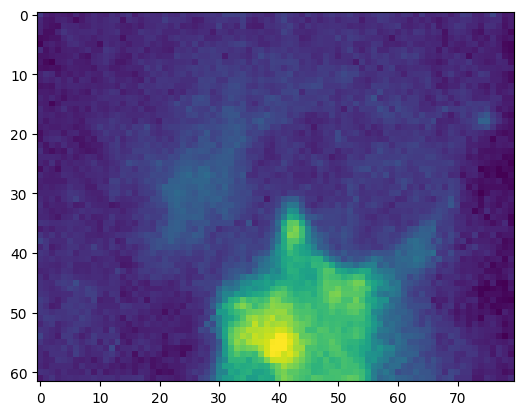

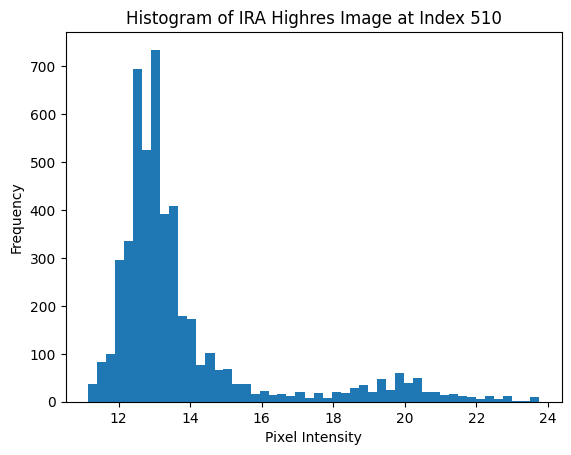

In [8]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
# For Jupyter notebooks, use os.chdir to set working directory or use absolute path
os.chdir('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace')
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from src.dataset import ThermalDataset
# TODO: implementa a class for detecting heat source
# The scene can contain human
# we first use adaptive thresholding to find human (TODO: explore the histogram of the entire image)

dataset = ThermalDataset("/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall0")
idx = 510
ira_highres = dataset.get_ira_highres(idx)
plt.imshow(ira_highres)
plt.show()

# plot the histogram of the image
plt.figure()
plt.hist(ira_highres.flatten(), bins=50)
plt.title("Histogram of IRA Highres Image at Index {}".format(idx))
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# # only plot the top 10% of the histogram
# plt.figure()
# plt.hist(ira_highres.flatten(), bins=50, range=(int(ira_highres.max()*0.7), int(ira_highres.max())))
# plt.title("Histogram of IRA Highres Image at Index {} (Top 90%)".format(idx))
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")
# plt.show()

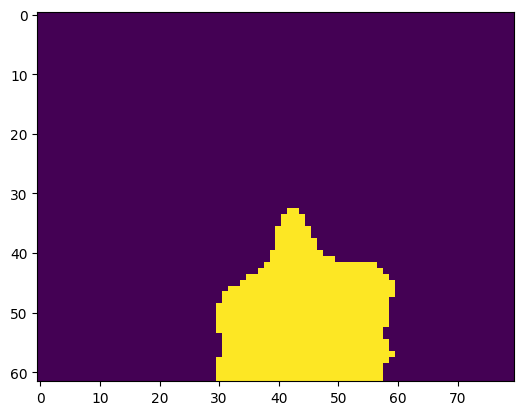

15.0
Number of detected heat source pixels:  600
Median value of detected heat source pixels:  19.66


In [28]:
import numpy as np

class HeatSourceDetector:
    def __init__(self):
        pass

    # returns threshold and a binary mask
    def get_thresh_mask_otsu(self, ira_img):
        # dynamic threshold obtained via Gaussian
        ira_uint8 = ira_img.astype('uint8')
        thresh, mask = cv2.threshold(ira_uint8,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        return thresh, mask
    
    def get_thresh_mask_otsu_gaussian(self, ira_img):
        # apply Gaussian blur to smooth the image
        ira_uint8 = ira_img.astype('uint8')
        ira_blurred = cv2.GaussianBlur(ira_uint8, (5, 5), 0)
        
        thresh, mask = cv2.threshold(ira_blurred,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        return thresh, mask
    
    def get_masked_values(self, ira_img, mask):
        # apply mask to the image
        ira_flat = ira_img.flatten()
        # print("number of total pixels: ", len(ira_flat))
        mask_flat = mask.flatten().astype(bool)
        masked_values = ira_flat[mask_flat]
        # print("number of masked values: ", len(masked_values))
        return masked_values
    
    def get_masked_median(self, ira_img, mask):
        masked_values = self.get_masked_values(ira_img, mask)
        median_val = np.median(masked_values)
        return median_val


if __name__ == "__main__":
    detector = HeatSourceDetector()
    thresh, mask = detector.get_thresh_mask_otsu_gaussian(ira_highres)
    plt.imshow(mask)
    plt.show()
    print(thresh)
    masked_values = detector.get_masked_values(ira_highres, mask)
    print("Number of detected heat source pixels: ", len(masked_values))
    median_val = detector.get_masked_median(ira_highres, mask)
    print("Median value of detected heat source pixels: ", median_val)